In [1]:
import pandas as pd

df = pd.read_csv("data/netflix_titles.csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")


El dataset tiene 8807 filas y 12 columnas.


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
print(f"Número de filas duplicadas: {df.duplicated().sum()}")


Número de filas duplicadas: 0


In [6]:
df['director'].fillna('Unknown Director', inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9696\1054268448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown Director', inplace=True)


In [7]:
df['director'] = df['director'].fillna('Unknown Director')


In [8]:
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            825
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [9]:
df['cast'] = df['cast'].fillna('Unknown Cast')
df['country'] = df['country'].fillna('Unknown Country')


In [10]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)


In [11]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Análisis de tipo de contenido

Vamos a analizar la cantidad de títulos que son películas (`Movie`) y los que son series de televisión (`TV Show`) en el catálogo de Netflix. Esto nos permitirá entender qué tipo de contenido predomina en la plataforma.


type
Movie      6126
TV Show    2664
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9696\53069250.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_counts.index, y=content_counts.values, palette='pastel')


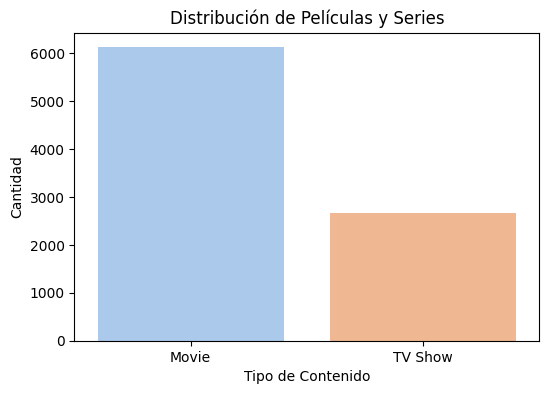

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de tipo de contenido
content_counts = df['type'].value_counts()

# Mostrar conteo
print(content_counts)

# Gráfica
plt.figure(figsize=(6,4))
sns.barplot(x=content_counts.index, y=content_counts.values, palette='pastel')
plt.title('Distribución de Películas y Series')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()


## Top 10 Países con más Títulos (Incluyendo 'Unknown Country')

Analizamos los 10 países con mayor cantidad de títulos en Netflix, considerando también aquellos registros donde no se conoce el país de origen (`Unknown Country`).


country
United States      2809
India               972
Unknown Country     829
United Kingdom      418
Japan               243
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9696\3935942716.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


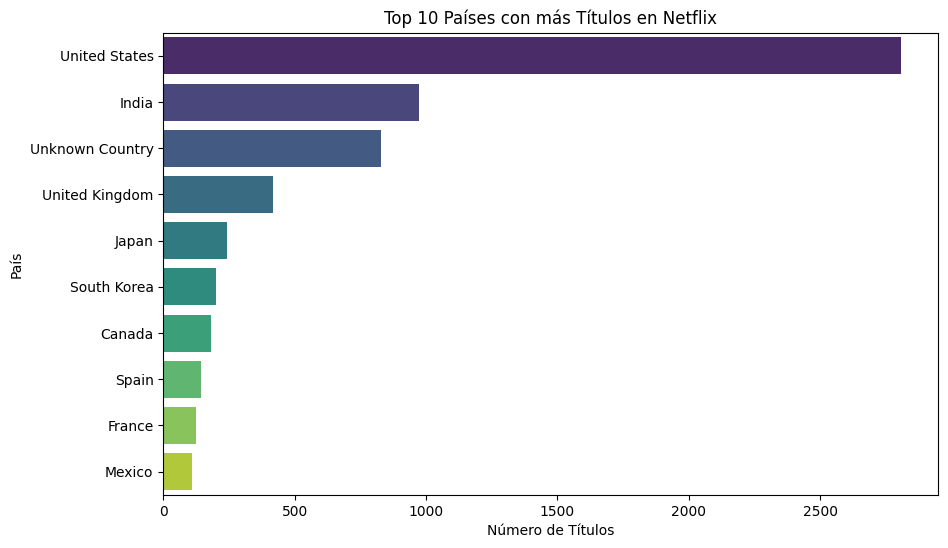

In [14]:
# Contar número de títulos por país
top_countries = df['country'].value_counts().head(10)

# Mostrar el top 10
print(top_countries)

# Gráfica
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette='viridis'
)
plt.title('Top 10 Países con más Títulos en Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('País')
plt.show()


## Top 10 Países con más Títulos (Sin 'Unknown Country')

Ahora analizamos los 10 países con más títulos en Netflix, excluyendo los registros donde no se tiene información sobre el país de origen (`Unknown Country`).


country
United States     2809
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9696\91366357.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


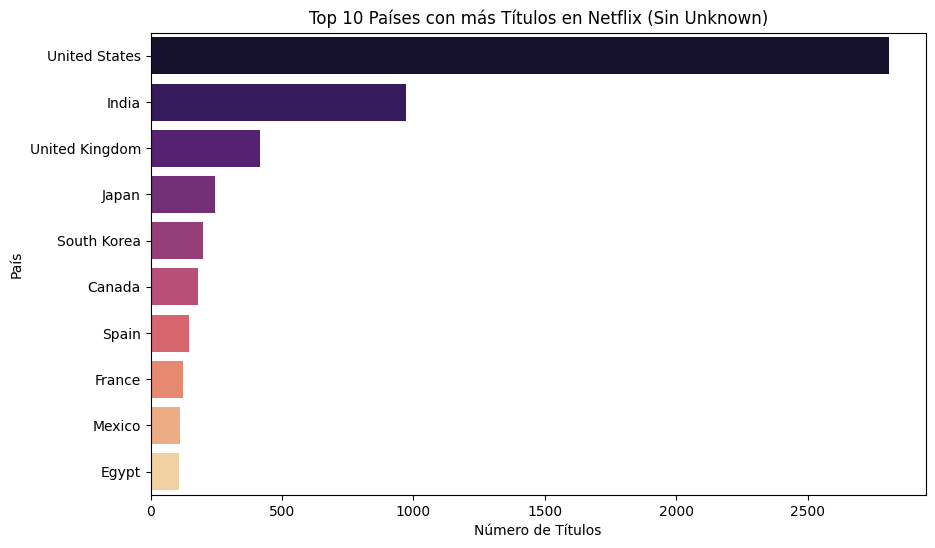

In [15]:
# Filtrar fuera 'Unknown Country'
filtered_df = df[df['country'] != 'Unknown Country']

# Contar de nuevo número de títulos por país
top_countries_filtered = filtered_df['country'].value_counts().head(10)

# Mostrar el top 10
print(top_countries_filtered)

# Gráfica
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_countries_filtered.values,
    y=top_countries_filtered.index,
    palette='magma'
)
plt.title('Top 10 Países con más Títulos en Netflix (Sin Unknown)')
plt.xlabel('Número de Títulos')
plt.ylabel('País')
plt.show()


## Evolución de Títulos por Año

En este análisis vamos a observar cómo ha evolucionado el número de títulos lanzados en Netflix a lo largo de los años. Analizaremos la variable `release_year` para identificar tendencias de crecimiento o declive en el contenido disponible.


release_year
1925    1
1942    2
1943    3
1944    3
1945    4
Name: count, dtype: int64
release_year
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Name: count, dtype: int64


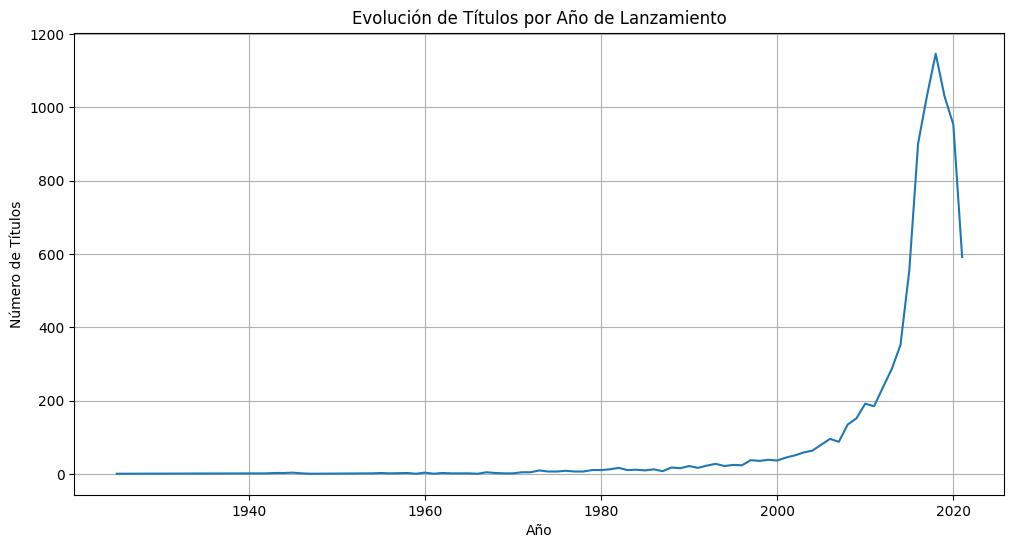

In [16]:
# Conteo de títulos por año de lanzamiento
titles_per_year = df['release_year'].value_counts().sort_index()

# Mostrar primeros y últimos años
print(titles_per_year.head())
print(titles_per_year.tail())

# Gráfica de línea
plt.figure(figsize=(12,6))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values)
plt.title('Evolución de Títulos por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')
plt.grid(True)
plt.show()


## Análisis de Clasificación por Edad (Rating)

En este análisis vamos a estudiar la distribución de las clasificaciones por edad (`rating`) de los títulos disponibles en Netflix. Esto nos permitirá entender qué tipo de contenido predomina: para adultos, adolescentes o todo público.


rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9696\1128117161.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')


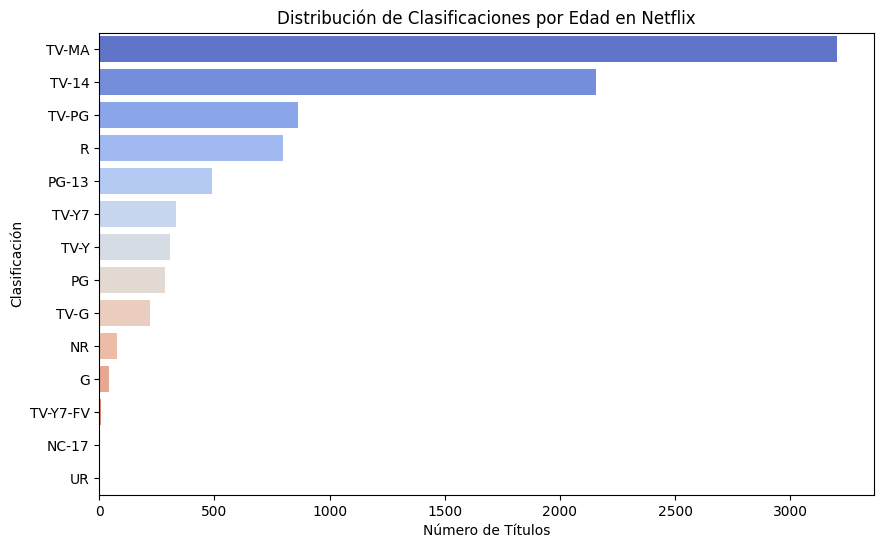

In [17]:
# Conteo de ratings
rating_counts = df['rating'].value_counts()

# Mostrar conteo
print(rating_counts)

# Gráfica de barras
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')
plt.title('Distribución de Clasificaciones por Edad en Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('Clasificación')
plt.show()
